<a href="https://colab.research.google.com/github/Harsh28-raj/ml_projects/blob/main/credit_crd_frd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np

In [71]:
df = pd.read_csv("/content/dataset(1).csv")

In [72]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01-01-2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09-03-1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01-01-2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21-06-1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01-01-2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19-01-1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01-01-2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12-01-1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01-01-2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28-03-1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [73]:
df.sample()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
408170,408170,04-07-2019 05:56,4.862290e+12,"fraud_Kihn, Abernathy and Douglas",shopping_net,5.57,Elizabeth,Payne,F,897 Daugherty Mission,...,41.0036,-78.1104,489,Pension scheme manager,15-09-1956,fbf6fae4ea5bac98f2f1aea4dfc026b5,1341381383,40.585885,-78.892995,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [75]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03
std,3.026977e+05,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2.621435e+05,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00
50%,5.242870e+05,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00
75%,7.864305e+05,4.642260e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [76]:
df.sample(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
243101,243101,02-05-2019 00:44,1.800650e+14,"fraud_Goyette, Howell and Collier",shopping_pos,3.45,Krystal,Gamble,F,47152 Clayton Burg,...,39.6747,-76.8941,11751,Clinical research associate,15-02-1964,5f43d554e4b6c093241ee3170210faf3,1335919479,39.946224,-76.256095,0
238692,238692,29-04-2019 16:37,4.384910e+15,fraud_Satterfield-Lowe,travel,3.95,Michelle,Russell,F,55505 Christy Via,...,46.9777,-96.4092,4508,Naval architect,24-04-1949,a4f54482b7e681be55f9642a08dbc2ed,1335717429,46.419557,-96.356182,0


In [77]:
drop_cols = [
    "cc_num",
    "first",
    "last",
    "street",
    "city",
    "job",
    "merchant",
    "trans_num",
    "dob",
    "trans_date_trans_time"
]

In [78]:
df=df.drop(columns=drop_cols)

In [79]:
df = df.drop(columns=["Unnamed: 0"])


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1048575 non-null  object 
 1   amt         1048575 non-null  float64
 2   gender      1048575 non-null  object 
 3   state       1048575 non-null  object 
 4   zip         1048575 non-null  int64  
 5   lat         1048575 non-null  float64
 6   long        1048575 non-null  float64
 7   city_pop    1048575 non-null  int64  
 8   unix_time   1048575 non-null  int64  
 9   merch_lat   1048575 non-null  float64
 10  merch_long  1048575 non-null  float64
 11  is_fraud    1048575 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 96.0+ MB


In [81]:
df["is_fraud"].value_counts(normalize=True)

,proportion
is_fraud,
0,0.994272
1,0.005728


In [82]:
df.isnull().sum().sort_values(ascending=False)

,0
category,0
amt,0
gender,0
state,0
zip,0
lat,0
long,0
city_pop,0
unix_time,0
merch_lat,0


In [83]:
df.sample(5)

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
1036739,kids_pets,41.92,F,OH,45106,38.9424,-84.0920,12349,1362521263,39.098246,-83.471591,0
604665,gas_transport,54.47,F,SC,29819,34.0326,-82.2027,1523,1347618985,34.560253,-82.642457,0
328005,kids_pets,64.47,M,WY,82936,41.0552,-110.1603,49,1338909616,41.726753,-110.534681,0
542701,entertainment,2.38,F,SC,29817,33.3645,-81.2718,4913,1345452992,32.771765,-82.267494,0
38205,kids_pets,12.01,M,IA,51453,42.2619,-94.5566,695,1327272381,43.158433,-94.275003,0


0=normal transaction


1=fraud transaction


In [84]:
df.is_fraud.value_counts()

,count
is_fraud,
0,1042569
1,6006


In [85]:

count = [0, 10, 50, 100, 500, 1000, np.inf]
range = ["0-10", "10-50", "50-100", "100-500", "500-1000", "1000+"]

amt_bins = pd.cut(df["amt"], bins=count, labels=range, include_lowest=True)

amt_bins.value_counts().sort_index()


,count
amt,
0-10,271896
10-50,272311
50-100,314821
100-500,176959
500-1000,9410
1000+,3178


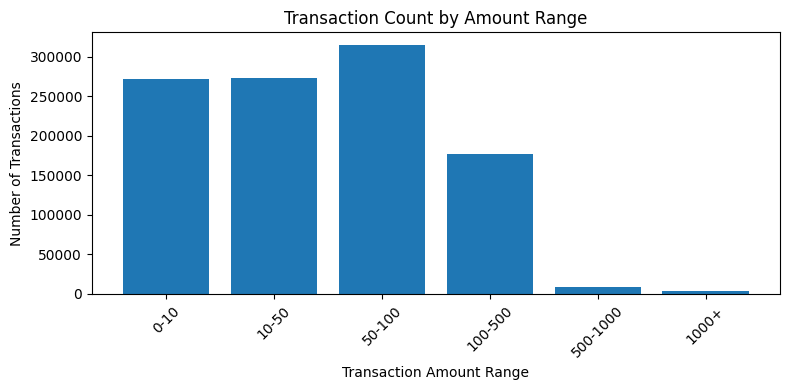

In [86]:
import matplotlib.pyplot as plt

# Count transactions in each bin
amt_counts = amt_bins.value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 4))
plt.bar(amt_counts.index.astype(str), amt_counts.values)
plt.xlabel("Transaction Amount Range")
plt.ylabel("Number of Transactions")
plt.title("Transaction Count by Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4232988211.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("amt_range")["is_fraud"].mean()


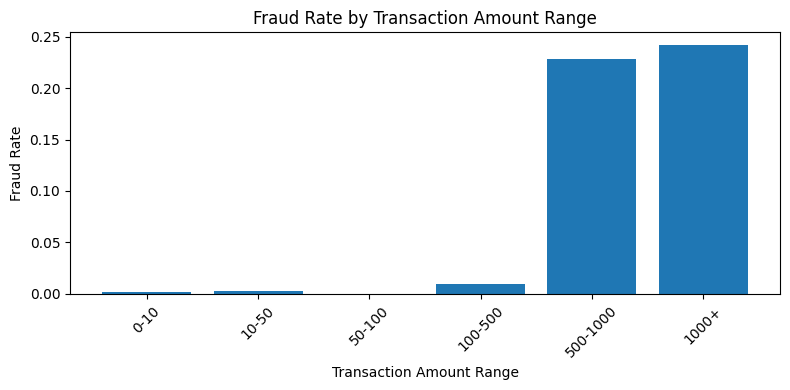

In [87]:
df["amt_range"] = amt_bins

fraud_rate = df.groupby("amt_range")["is_fraud"].mean()

plt.figure(figsize=(8, 4))
plt.bar(fraud_rate.index.astype(str), fraud_rate.values)
plt.xlabel("Transaction Amount Range")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Transaction Amount Range")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interpretation (THIS IS GOLD 🥇)

✔ High-value transactions have much higher fraud probability


✔ Fraudsters target large amounts

✔ Model must treat high amounts differently

This is EXACTLY what banks see in real data.

In [88]:
df["category"].value_counts().sort_values(ascending=False)


,count
category,
gas_transport,106430
grocery_pos,99906
home,99578
shopping_pos,94353
kids_pets,91404
shopping_net,78899
entertainment,75981
food_dining,74041
personal_care,73498


In [89]:
df.groupby("gender")["is_fraud"].mean()


,is_fraud
gender,
F,0.005183
M,0.006386


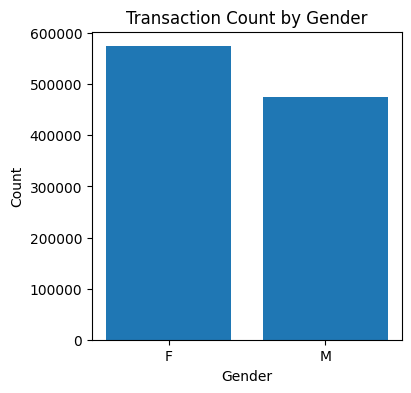

In [90]:
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(4,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Transaction Count by Gender")
plt.show()


In [91]:
df.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_range
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0-10
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,100-500
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,100-500
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,10-50
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,10-50


FEATURE ENGINEERING

In [92]:
df["log_amt"] = np.log1p(df["amt"])

In [93]:
df.columns

Index(['category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'amt_range',
       'log_amt'],
      dtype='object')

In [94]:
df.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_range,log_amt
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0-10,1.786747
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,100-500,4.684259
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,100-500,5.398660
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,10-50,3.828641
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,10-50,3.760269


✔ Yes, this automatically segments time

✔ Hour → 24 segments

✔ Day → 7 segments

✔ Weekend → clean fraud indicator

✔ No extra binning needed

In [95]:
dt = pd.to_datetime(df["unix_time"], unit="s")

df["hour"] = dt.dt.hour
df["dayofweek"] = dt.dt.dayofweek
df["is_weekend"] = dt.dt.dayofweek.isin([5, 6]).astype(int)

In [96]:
df.columns

Index(['category', 'amt', 'gender', 'state', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'amt_range',
       'log_amt', 'hour', 'dayofweek', 'is_weekend'],
      dtype='object')

In [97]:
df.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_range,log_amt,hour,dayofweek,is_weekend
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0-10,1.786747,0,6,1
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,100-500,4.684259,0,6,1
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,100-500,5.398660,0,6,1
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,10-50,3.828641,0,6,1
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,10-50,3.760269,0,6,1


In [98]:
df["is_weekend"].value_counts()

,count
is_weekend,
0,629579
1,418996


In [99]:
df["hour"].value_counts()

,count
hour,
22,54103
23,54094
18,53392
19,53135
16,53114
15,52976
13,52964
17,52841
21,52841


In [100]:
import numpy as np

# Earth radius in km
R = 6371

lat1 = np.radians(df["lat"])
lon1 = np.radians(df["long"])
lat2 = np.radians(df["merch_lat"])
lon2 = np.radians(df["merch_long"])

dlat = lat2 - lat1
dlon = lon2 - lon1

a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2

df["cust_merch_dist"] = 2 * R * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


In [101]:
df.head()

,category,amt,gender,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_range,log_amt,hour,dayofweek,is_weekend,cust_merch_dist
0,misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0-10,1.786747,0,6,1,78.597568
1,grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,100-500,4.684259,0,6,1,30.212176
2,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,100-500,5.398660,0,6,1,108.206083
3,gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,10-50,3.828641,0,6,1,95.673231
4,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,10-50,3.760269,0,6,1,77.556744


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   category         1048575 non-null  object  
 1   amt              1048575 non-null  float64 
 2   gender           1048575 non-null  object  
 3   state            1048575 non-null  object  
 4   zip              1048575 non-null  int64   
 5   lat              1048575 non-null  float64 
 6   long             1048575 non-null  float64 
 7   city_pop         1048575 non-null  int64   
 8   unix_time        1048575 non-null  int64   
 9   merch_lat        1048575 non-null  float64 
 10  merch_long       1048575 non-null  float64 
 11  is_fraud         1048575 non-null  int64   
 12  amt_range        1048575 non-null  category
 13  log_amt          1048575 non-null  float64 
 14  hour             1048575 non-null  int32   
 15  dayofweek        1048575 non-null  int32   
 16  

In [103]:
df[["amt", "log_amt", "hour", "dayofweek", "is_weekend", "cust_merch_dist"]].head()

,amt,log_amt,hour,dayofweek,is_weekend,cust_merch_dist
0,4.97,1.786747,0,6,1,78.597568
1,107.23,4.684259,0,6,1,30.212176
2,220.11,5.398660,0,6,1,108.206083
3,45.00,3.828641,0,6,1,95.673231
4,41.96,3.760269,0,6,1,77.556744


In [104]:
df = df.drop(columns=["amt_range"])